# NLP with python 

In [1]:
import nltk

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message, '\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label', 'message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length'] = messages['message'].apply(len)

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

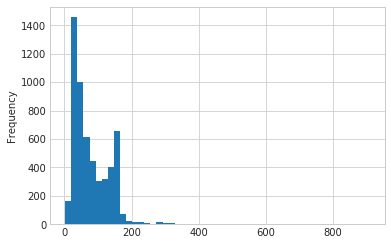

In [14]:
sns.set_style('whitegrid')
messages['length'].plot.hist(bins=50)

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f334806d8>,
      dtype=object)

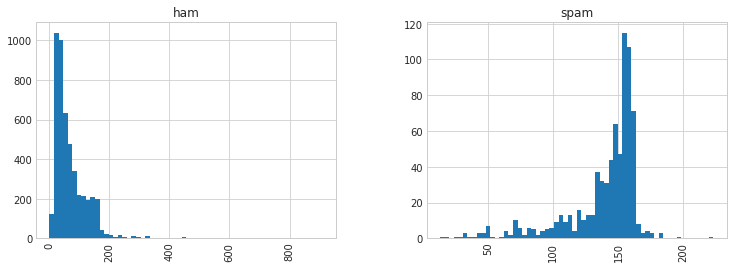

In [17]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

By this we can see that there's a trend that, spam messages are more longer than that of ham. Spam has 150 chars on an average where ham has 50

We'll remove punctuation marks and some very basic english words that don't have importance. One way of removeing them is by using stopwords package from nltk.

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
def text_process(message):
    noPunc = [char for char in message if char not in string.punctuation]
    noPunc = ''.join(noPunc)
    
    return [word for word in noPunc.split() if word not in stopwords.words('english')]
    

In [20]:
messages['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [21]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

In [42]:
messages['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

TR Normalization stemming wiki/stemming

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.



In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

#printing total number of words in vocabulary
print(len(bow_transformer.vocabulary_))

11617


In [24]:
messNO_3 = messages['message'][2]
messNO_3

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [25]:
bowT3 = bow_transformer.transform([messNO_3])
print(bowT3)


  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1589)	1
  (0, 1882)	2
  (0, 1993)	1
  (0, 2896)	1
  (0, 4095)	1
  (0, 4923)	1
  (0, 5811)	1
  (0, 6523)	2
  (0, 6749)	1
  (0, 9351)	1
  (0, 9392)	1
  (0, 9444)	1
  (0, 10704)	1
  (0, 10878)	1
  (0, 11276)	1
  (0, 11315)	1


This means there are many unique words, and two repeated words(twice)

In [26]:
bow_transformer.get_feature_names()[6523]

'entry'

In [27]:
messages_bow = bow_transformer.transform(messages['message'])

In [28]:
print(messages_bow.shape)

(5572, 11617)


In [29]:
messages_bow.nnz

56024

In [30]:
sparsity = (100.0 * messages_bow.nnz/(messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity {}'.format(sparsity))

sparsity 0.08655038742205227


In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)


In [32]:
tfidf3 = tfidf_transformer.transform(bowT3)

In [33]:
print(tfidf3)

  (0, 11315)	0.19104387220509106
  (0, 11276)	0.15898145347176754
  (0, 10878)	0.13995540820792943
  (0, 10704)	0.2118842499614227
  (0, 9444)	0.16121646071144807
  (0, 9392)	0.22538631044314436
  (0, 9351)	0.22538631044314436
  (0, 6749)	0.18466951562322612
  (0, 6523)	0.347904654589528
  (0, 5811)	0.1887440015250524
  (0, 4923)	0.16452475271486866
  (0, 4095)	0.1544015632869991
  (0, 2896)	0.17524194104333074
  (0, 1993)	0.1526581729225716
  (0, 1882)	0.4507726208862887
  (0, 1589)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


In [34]:

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [35]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
spam_classifier = MultinomialNB().fit(messages_tfidf, messages['label'])

In [46]:
from sklearn.model_selection import train_test_split
mes_train, mes_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [43]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                   ('tfidf', TfidfTransformer()),
                   ('spam_classifier', MultinomialNB())])

In [48]:
pipeline.fit(mes_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f9f33356ae8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...se, use_idf=True)), ('spam_classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [51]:
predictions = pipeline.predict(mes_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1447
       spam       1.00      0.69      0.82       225

avg / total       0.96      0.96      0.96      1672

